In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import datetime
import psutil
import math
import seaborn as sns
from datetime import timedelta, datetime, tzinfo, timezone, time
from PIL import Image, ImageDraw
from numpy import asarray

In [2]:
def show_data():
    train_folder = [7554]#,7556,7557,7558,7559,7560,7561,7563,7569,7570,7571,7572,7573,7574]
    for j in train_folder:
        for i in range(1,22):
            url = r"train/"+str(j)+"/SimpleTest/"+str(i)+".csv"
            data = pd.read_csv(url)
            data.columns = data.columns.str.replace(' ', '')
            submit_time = data.iloc[-1][0]
            start_time = data.iloc[-2][0]
            data.dropna(inplace=True)
            data['X'] = data.X.astype(float)
            data.Time = data.Time.str.replace("00:","").astype(np.float64)
            
            fig=plt.figure(figsize=(20,5))

            ax= fig.add_subplot(1, 2, 1)
            ax.plot(data.Pressure,"#FF8000")
            ax.set_title("Pressure",fontdict={'fontsize': 20})

            ax2 = fig.add_subplot(1, 2, 2)
            ax2.plot(data.Time,c='b')
            ax2.set_title("Time",fontdict={'fontsize': 20})

            plt.show()
            hand_lifts = 0
            rolling_std = data.Time.rolling(window=20).std()

            for i in range(len(data.Time)-1):
                if (data.Time[i+1] > data.Time[i] + rolling_std[i]):
                    hand_lifts +=1

            print("Number of hand lifts: " + str(hand_lifts))

>  Notice that file number 22 does not exist (there is only an empty image), we will ignore this file.

In [40]:
data = pd.read_csv(r'train/7572/SimpleTest/6.csv')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          329 non-null    object 
 1    Y         327 non-null    float64
 2    Pressure  327 non-null    float64
 3    TiltX     327 non-null    float64
 4    TiltY     327 non-null    float64
 5    Time      327 non-null    object 
dtypes: float64(4), object(2)
memory usage: 15.5+ KB


In [42]:
#remove the extra spaces in the columns.
print(data.columns)
data.columns = data.columns.str.replace(' ', '')
data.head(3)

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')


,X,Y,Pressure,TiltX,TiltY,Time
0,486.0675,551.506667,0.197510,12363.0,11061.0,00:02.2328375
1,486.495,550.240000,0.229736,12363.0,11061.0,00:02.2328375
2,486.495,550.240000,0.238281,12363.0,11061.0,00:02.2549812


In [43]:
submit_time = data.iloc[-1][0]
start_time = data.iloc[-2][0]
data.dropna(inplace=True)

print(start_time)
print(submit_time)

Time Elapsed till drawing started: 00:02.2170433
Time Elapsed till drawing submit: 00:10.4630519


In [44]:
total_time = float(submit_time[37:]) - float(start_time[38:])
print("Total time drawing: 00:" +str(total_time))

Total time drawing: 00:8.2460086


In [45]:
data['X'] = data.X.astype(float)

In [46]:
# change the Time column to float
data.Time = data.Time.str.replace("00:","").astype(np.float64)

In [47]:
data.head(3)

,X,Y,Pressure,TiltX,TiltY,Time
0,486.0675,551.506667,0.197510,12363.0,11061.0,2.232838
1,486.4950,550.240000,0.229736,12363.0,11061.0,2.232838
2,486.4950,550.240000,0.238281,12363.0,11061.0,2.254981


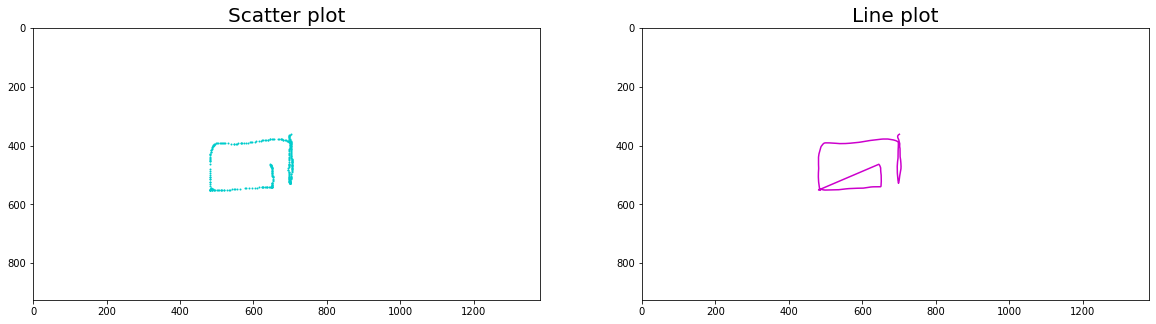

In [48]:
fig=plt.figure(figsize=(20,5))
ax= fig.add_subplot(1, 2, 1)

plt.gca().invert_yaxis()
ax.scatter(data.X,data.Y,s=1,c='#00CCCC')
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
ax.set_title("Scatter plot",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
plt.gca().invert_yaxis()
ax2.plot(data.X,data.Y,"#CC00CC")
ax2.set_xbound(lower=0.0, upper=1381)
ax2.set_ybound(lower=0.0, upper=925)
ax2.set_title("Line plot",fontdict={'fontsize': 20})

plt.show()

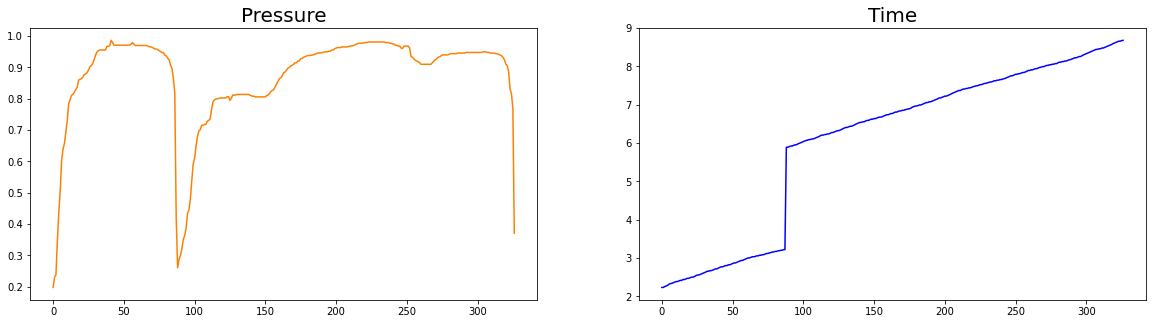

In [49]:
fig=plt.figure(figsize=(20,5))

ax= fig.add_subplot(1, 2, 1)
ax.plot(data.Pressure,"#FF8000")
ax.set_title("Pressure",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(data.Time,c='b')
ax2.set_title("Time",fontdict={'fontsize': 20})

plt.show()

## *Hand lifts:*

In [50]:
hand_lifts = 0
rolling_std = data.Time.rolling(window=20).std()

for i in range(len(data.Time)-1):
    if (data.Time[i+1] > data.Time[i] + rolling_std[i]):
        hand_lifts +=1
        
print("Number of hand lifts: " + str(hand_lifts))

Number of hand lifts: 1


## *Number of lines:*

In [51]:
distance = []
for x in range(len(data.X)-1):
        distance.append(math.sqrt((data.X[x+1] - data.X[x])**2 + (data.Y[x+1] - data.Y[x])**2))       

In [52]:
distance =pd.Series(distance)

In [53]:
print('max distance:',max(distance),'\nmin distance:',min(distance),'\nmean distance:',distance.mean())

max distance: 185.9103485124694 
min distance: 0.0 
mean distance: 3.407834227840895


In [54]:
slopes = [] 
for i in range(len(data.X)-1):
    if (data.X[i+1]- data.X[i]) == 0: 
        slopes.append(math.nan)
    else:
        slopes.append((data.Y[i+1]- data.Y[i])/(data.X[i+1]- data.X[i]))

In [55]:
slopes = pd.Series(slopes)

In [56]:
slopes.fillna(0,inplace=True)

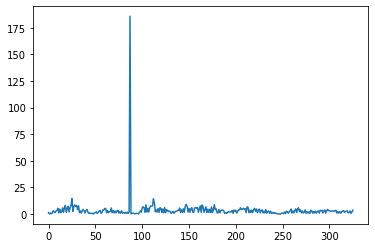

In [57]:
plt.plot(distance)

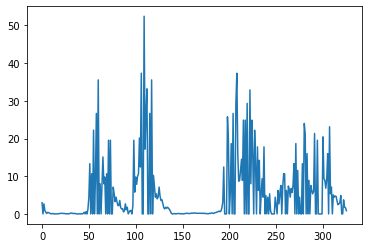

In [75]:
plt.plot(slopes.abs())

In [80]:
numOfLines = 1
rolling_std = slopes.abs().rolling(window=20).mean()

for i in range(len(slopes)-1):
    if (slopes[i+1] > slopes[i] + rolling_std[i]):
        numOfLines = numOfLines + 1

print("Number of lines: " + str(numOfLines))

Number of lines: 58


## *Open or closed shape:*
Only relevant for a number of drawing

(3,4,8,11,13,16,17,19,20,21)

In [22]:
img = Image.open(r'train/7572/SimpleTest/4.PNG')
img = img.convert("RGB")
img = img.crop((0,220,1360,885))

In [23]:
target_pixel = (0,0)
target_color = (255,255,0)
ImageDraw.floodfill(img,target_pixel,target_color)#,thresh=0.5
im = asarray(img)

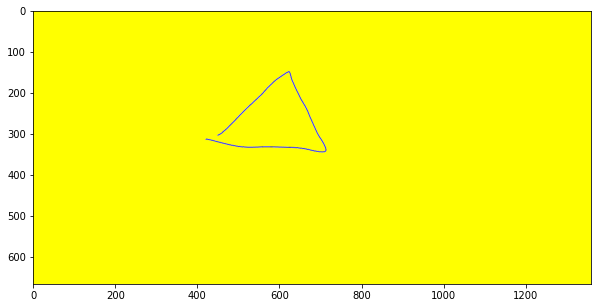

In [24]:
fig = plt.figure(figsize=(10, 7))
  
fig.add_subplot(1, 1, 1)
plt.imshow(img)


In [25]:
count =0 
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        for q in range(3):
            if ((im[i][j] == [255,255,255]).all() == True):
                count+=1
if count == 0:
    print ("Open Shape")
else: 
    print ("Close Shape")

Open Shape


<IPython.core.display.Javascript object>


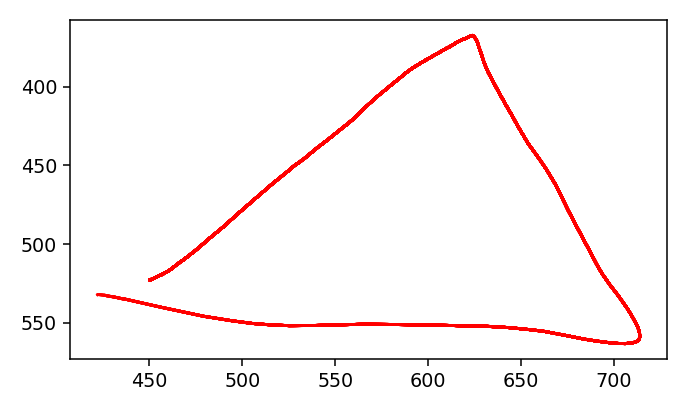

In [29]:
#import psutil
%matplotlib notebook

#plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure(figsize=(5,3),dpi=100)
ax = fig.add_subplot(111)
plt.gca().invert_yaxis()
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
plt.tight_layout()
plt.show()


In [30]:
c=[]
d=[]
for i in range (len(data.X)):
    c.append(data.X[i])
    d.append(data.Y[i])
    plt.tight_layout()
    ax.plot(c,d , color='r')
    fig.canvas.draw() 
plt.close()


<IPython.core.display.Javascript object>


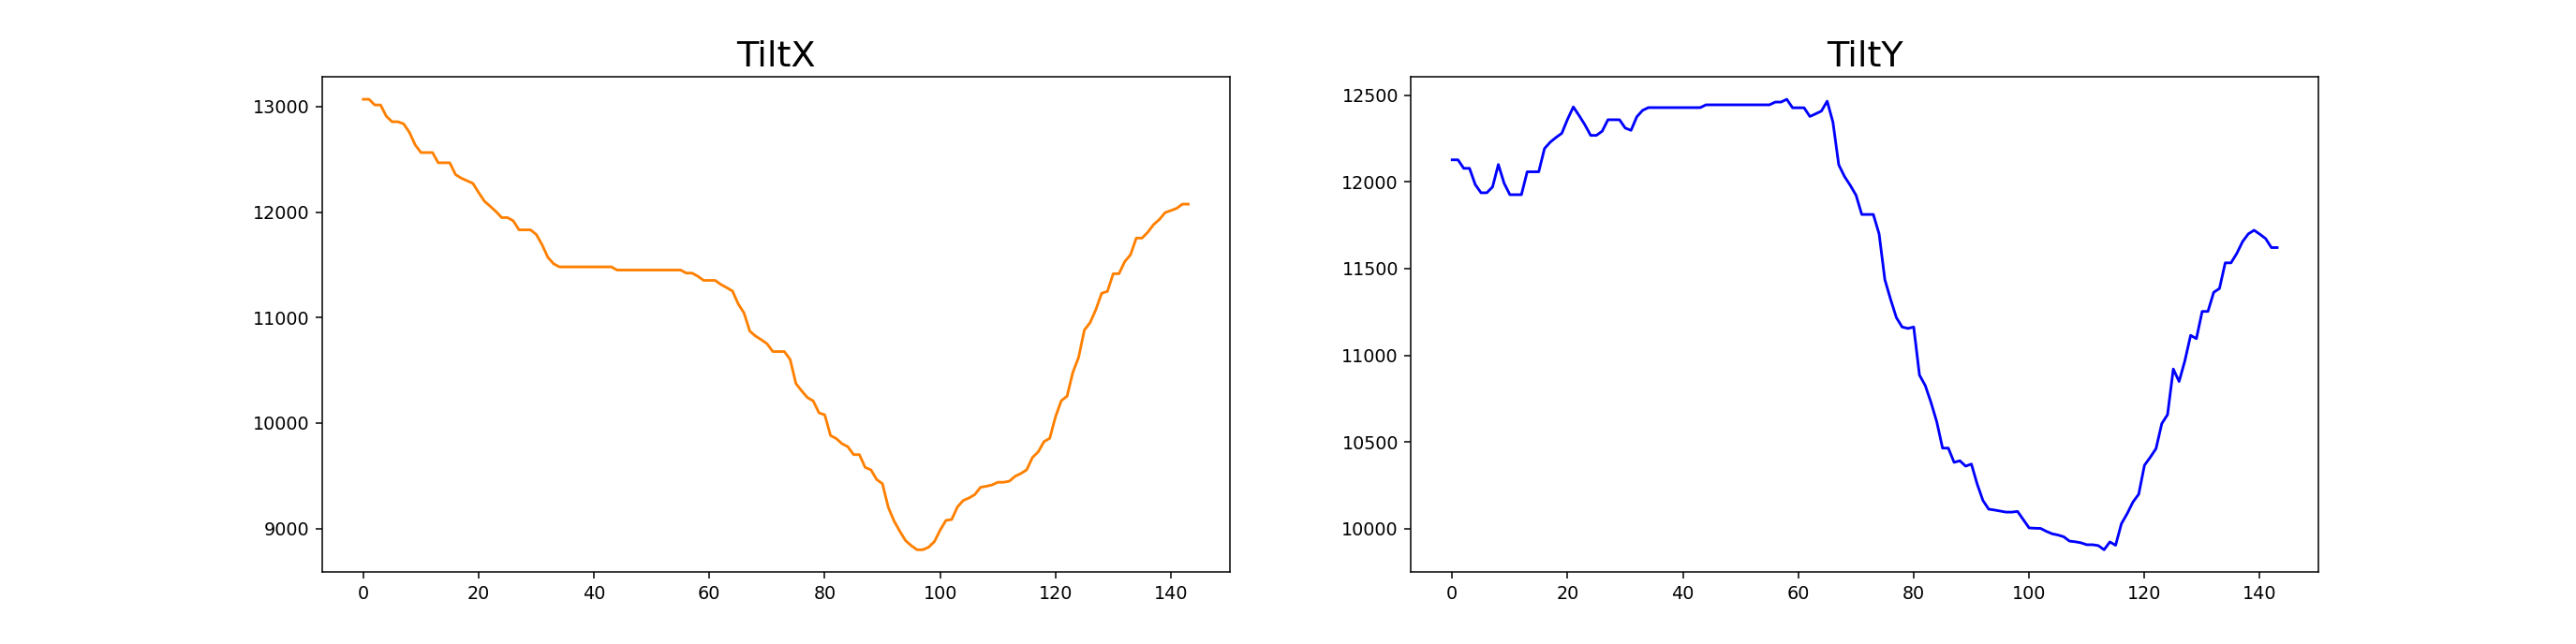

In [31]:
fig=plt.figure(figsize=(20,5))

ax= fig.add_subplot(1, 2, 1)
ax.plot(data.TiltX,"#FF8000")
ax.set_title("TiltX",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(data.TiltY,c='b')
ax2.set_title("TiltY",fontdict={'fontsize': 20})

plt.show()